# Stock Price Prediction using LSTM and yfinance

### Goal of the Project:
In this project, we aim to predict the future closing prices of a stock using historical stock price data. We will fetch this data using the **yfinance** library and build a predictive model using **LSTM (Long Short-Term Memory)**. LSTM is a type of recurrent neural network (RNN) that is well-suited for time-series forecasting because it can capture patterns over time.

### Why LSTM for Stock Prediction?
LSTM models are designed to handle sequential data, making them particularly suitable for stock price prediction, where past prices influence future prices. Traditional models often fail to account for such sequential dependencies, whereas LSTM can retain information over long sequences of data.

### Approach:
1. **Fetching Data**: Use **yfinance** to download historical stock prices.
2. **Exploratory Data Analysis (EDA)**: Visualize the stock prices to understand trends.
3. **Data Preprocessing**: Prepare the data for the LSTM model by normalizing and reshaping it.
4. **Building the LSTM Model**: Create an LSTM model to predict future stock prices.
5. **Model Evaluation**: Evaluate the model's performance using metrics such as **Root Mean Squared Error (RMSE)**.
6. **Future Prediction**: Use the trained model to predict stock prices and visualize the results.

This structured approach ensures a rigorous analysis and demonstrates the power of machine learning in finance.

# Step 1: Import necessary libraries
We will use the following libraries:

- **yfinance**: To fetch stock market data directly from Yahoo Finance.
- **NumPy**: For numerical computations.
- **Pandas**: To manipulate the stock data in DataFrame format.
- **Matplotlib**: To visualize stock prices.
- **scikit-learn**: To scale and normalize our data using `MinMaxScaler`.
- **TensorFlow (keras)**: To build and train the LSTM model.
- **math**: To perform basic mathematical calculations.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import math
import yfinance as yf
from warnings import filterwarnings
filterwarnings('ignore')

# Step 2: Fetch historical stock data
We will use the **yfinance** library to download historical stock price data. For this example, we'll fetch **Apple's (AAPL)** stock data over the last 10 years.

- `yfinance.download()` allows us to specify the stock ticker symbol and the period of data we want.

In [19]:
# Download Apple's stock data from Yahoo Finance
stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start='2014-01-01', end='2024-01-01')

# Display the first few rows of the dataset
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253258,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874273,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966290,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844952,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951630,258529600


# Step 3: Visualize the stock prices
It’s important to visualize the stock data to observe trends and volatility. We will plot the **Closing Prices** of the stock to get an idea of how the stock has performed over the years.

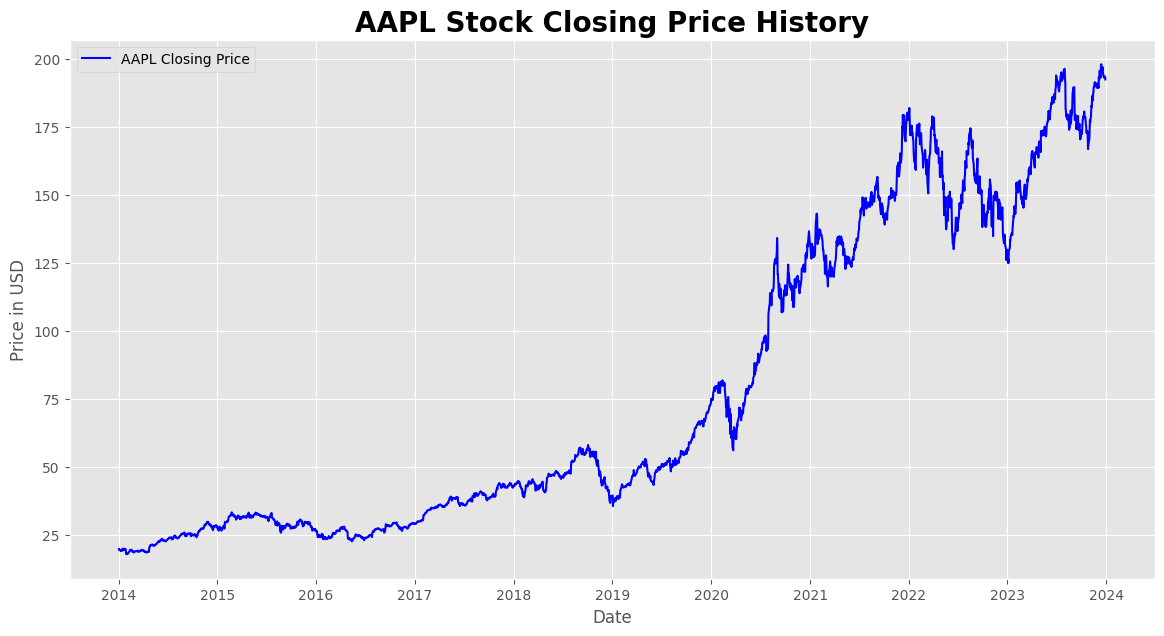

In [20]:
# Visualizing the closing prices over time
plt.figure(figsize=(14,7))
plt.style.use('ggplot')
plt.plot(df['Close'], color='blue', label=f'{stock_symbol} Closing Price')
plt.title(f'{stock_symbol} Stock Closing Price History', fontweight='bold', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Data Preprocessing
Before feeding data into the LSTM model, we need to preprocess it:

### Why Normalize the Data?
LSTM models perform better when the data is normalized (scaled between 0 and 1). We’ll use **MinMaxScaler** to normalize the closing prices.

### Creating Input Sequences:
LSTM requires sequences of past stock prices as input. We'll create a window of the past 60 days' closing prices to predict the stock price of the 61st day.

In [21]:
# Filter the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Define training data length (80% of the dataset)
train_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[0:train_data_len, :]

# Split the data into x_train (features) and y_train (target)
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 days of data
    y_train.append(train_data[i, 0])  # Predict the 61st day

# Convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 5: Building the LSTM Model
We will now build an LSTM model using the **Keras** API from **TensorFlow**. The model will have multiple LSTM layers, with **Dropout** layers to reduce overfitting. We'll also add **Dense** layers to output the predicted stock price.

In [22]:
# Initialize the LSTM model
model = Sequential()

# Add the first LSTM layer with 50 units and Dropout of 20%
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add a second LSTM layer with 50 units and Dropout of 20%
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer with 25 units
model.add(Dense(units=25))

# Add a Dense output layer
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with a batch size of 32 and 20 epochs
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0127
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.4640e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0034
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.5716e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.6073e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.5045e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.0340e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.1441e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.2719e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.8273e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6194e-04
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━

# Step 6: Evaluating the LSTM Model
Once the model is trained, we will test it on the remaining 20% of the data to evaluate its performance. We'll also compute the **Root Mean Squared Error (RMSE)** to assess the prediction accuracy.

In [23]:
# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]

# Prepare x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test into a numpy array
x_test = np.array(x_test)

# Reshape x_test for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE: 6.155296241272293


# Step 7: Visualizing Predicted vs Actual Prices
We will now visualize how well the LSTM model's predictions match the actual stock prices. This will help us assess the model’s effectiveness.

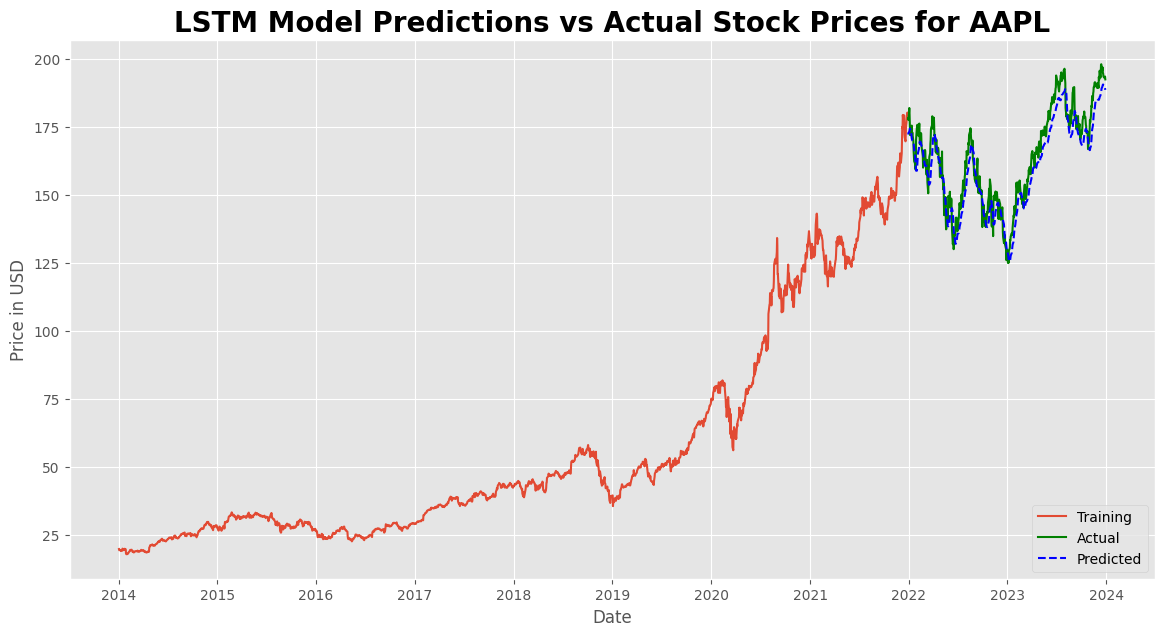

,Close,Predictions
Date,,
2021-12-30,178.199997,172.255203
2021-12-31,177.570007,172.878616
2022-01-03,182.009995,173.273071
2022-01-04,179.699997,173.925461
2022-01-05,174.919998,174.420425
...,...,...
2023-12-22,193.600006,190.470917
2023-12-26,193.050003,190.109283
2023-12-27,193.149994,189.617844


In [24]:
# Plot the actual prices along with the model's predicted prices
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14,7))
plt.style.use('ggplot')
plt.title(f'LSTM Model Predictions vs Actual Stock Prices for {stock_symbol}', fontweight='bold', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Prices', color='green')
plt.plot(valid['Predictions'], label='Predicted Prices', linestyle='dashed', color='blue')
plt.legend(['Training', 'Actual', 'Predicted'], loc='lower right')
plt.grid(True)
plt.show()

# Display the dataframe showing actual vs predicted prices
valid

# Step 8: Predicting Future Stock Prices
We will now use the trained LSTM model to predict future stock prices based on the last 60 days of historical data.

In [25]:
# Get the last 60 days of closing price data and reshape it for LSTM prediction
last_60_days = df['Close'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create a list to store inputs for prediction
X_input = []
X_input.append(last_60_days_scaled)

# Reshape the data for prediction
X_input = np.array(X_input)
X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))

# Predict the next day's closing price
predicted_price = model.predict(X_input)
predicted_price = scaler.inverse_transform(predicted_price)

print(f'The predicted stock price for the next day is: ${predicted_price[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
The predicted stock price for the next day is: $188.25
